<img src="https://raw.githubusercontent.com/AdrianoPereira/CAP421/main/lectures/homework01/images/cover-convolutional-filters.png" style="width: 100%;">

### OVERVIEW
<hr />

This notebook contains exercises referring to the basic concepts of image processing (convolutional filters) proposed by Professor Thales Körting in the CAP421- Deep Learning discipline offered in the Post-Graduate Program in Applied Computing at the National Institute for Space Research.


#### TABLE OF CONTENT
<hr />

* Import libraries

* Download Image

* Exercise 1: Create a average convolutional filter

* Exercise 1.2: Add a padding in average convolutional filter

* Exercise 2: Add a stride in average convolutional filter

* Exercise 3: Create a high pass convolutional filter

* Exercise 4: Create morphological convolutional filter (dilatation and erosion)


### Import libraries

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Download Image

In [92]:
raster_filename = 'data/heliponto_2.tif'
if not os.path.exists(raster_filename):
    !wget http://github.com/tkorting/remote-sensing-images/raw/master/{raster_filename.split(os.sep)[-1]}
    !mkdir {raster_filename.split(os.sep)[0]}
    !mv {raster_filename.split(os.sep)[-1]} {raster_filename}

### Exercise 1

Create a convolution kernel called `average_kernel` as a `numpy array` with the following parameters:
* width: 15
* height: 15
* weights: all values equal to 1 / (15 * 15) or `~0.00444`

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`image_matrix`) and output (`conv_matrix`) images.


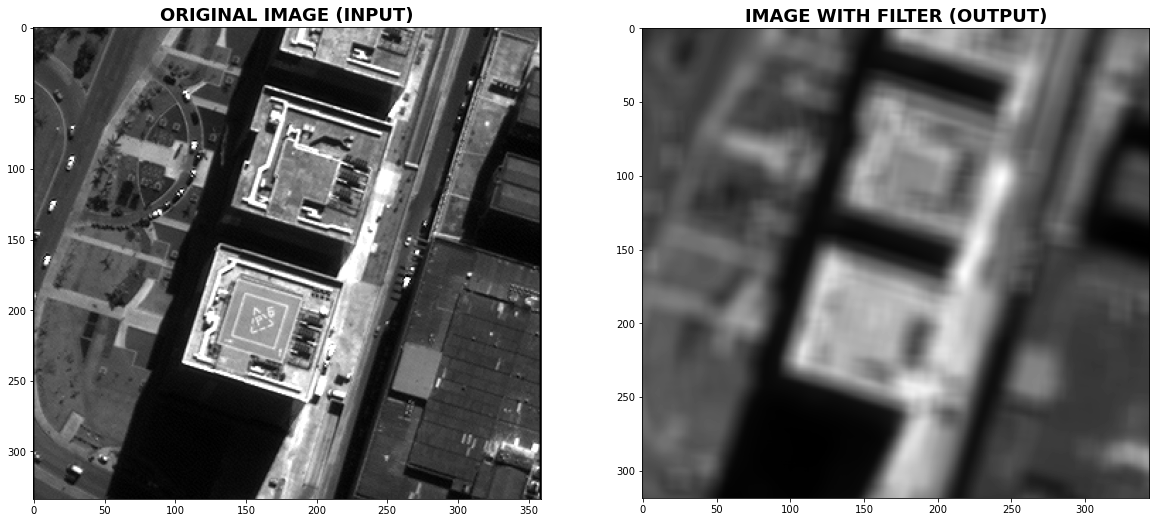

In [189]:
# Creating a class with methods to read image, apply filter and plot
class Image(object):
    """Image
    Exercise 1
    """
    def __init__(self, image_filepath):
        self.img_matrix = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
        
    def average_kernel(self, width=15, height=15, **kwargs):
        """Kernel filter using the average of a 15x15 window
        """
    
        avg_kernel = np.ones(height*width)/(height*width)
        
        output = []
        for i in range(0, self.img_matrix.shape[0]-height):
            temp = []
            for j in range(0, self.img_matrix.shape[1]-width):
                temp.append(
                    np.dot(self.img_matrix[i:i+height, j:j+width].ravel(), avg_kernel)
                )
            output.append(temp)
        return np.array(output)
    
    def plot_input_and_output(self, **kwargs):
        fig, ax = plt.subplots(1, 2, figsize=(20, 10), facecolor='w')
        output = self.average_kernel()
        ax[0].set_title("ORIGINAL IMAGE (INPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[0].imshow(self.img_matrix, **kwargs)
        
        ax[1].set_title("IMAGE WITH FILTER (OUTPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[1].imshow(output, **kwargs)
        
        plt.savefig(f"./images/average_filter.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        
        plt.show()
        

# Creating object class and executing the methods
image = Image(image_filepath=raster_filename)
image.plot_input_and_output(cmap='gray')

### Exercise 1.2
<hr />
From Exercise 1, implement padding and display, using matplotlib, the input (image_matrix) with padding, and output (conv_matrix_padding) images.


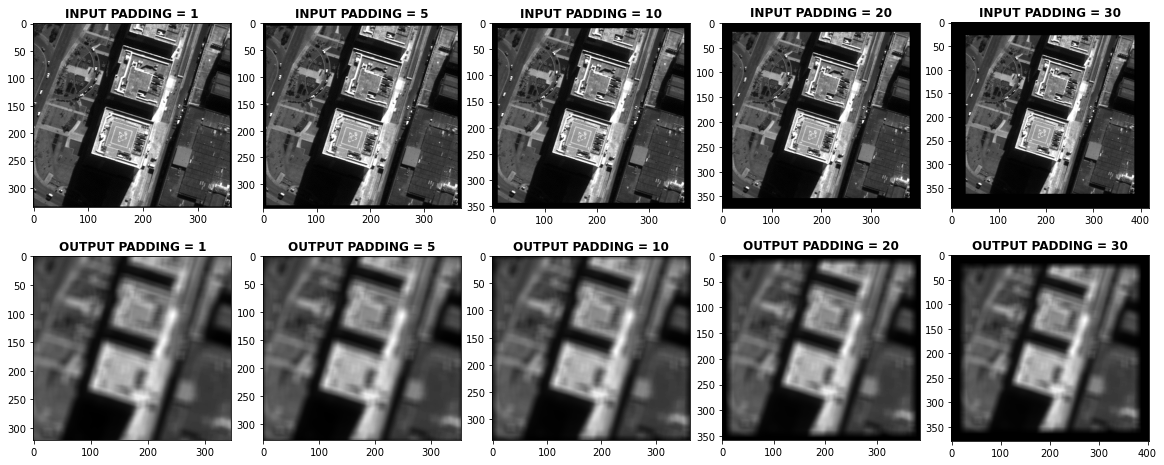

In [191]:
# Creating a class with methods to read image, apply filter and plot
class Image(object):
    """Image
    Exercise 1.2
    """
    def __init__(self, image_filepath):
        self.img_matrix = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
        
    def average_kernel(self, width=15, height=15, padding=1, **kwargs):
        """Kernel filter using the average of a 15x15 window
        """
    
        avg_kernel = np.ones(height*width)/(height*width)
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        output = []
        for i in range(0, img_input.shape[0]-height):
            temp = []
            for j in range(0, img_input.shape[1]-width):
                temp.append(
                    np.dot(img_input[i:i+height, j:j+height].ravel(), avg_kernel)
                )
            output.append(temp)
            
        return img_input, np.array(output)
        
    def plot_input_and_output(self, **kwargs):
        fig, ax = plt.subplots(1, 2, figsize=(15, 35), facecolor='w')
        img_input, output = self.average_kernel()
        
        ax[0].set_title("ORIGINAL IMAGE (INPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[0].imshow(img_input, **kwargs)
        
        ax[1].set_title("IMAGE WITH FILTER (OUTPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[1].imshow(output, **kwargs)
        plt.savefig(f"./images/average_filter_padding.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_multi_paddings(self, paddings=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(paddings), figsize=(20, 8), facecolor='w')
        
        for i, padding in enumerate(paddings):
            inp, out = self.average_kernel(padding=padding)
            
            ax[0][i].set_title(f"INPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_filter_multi_paddings.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
        

# Creating object class and executing the methods
image = Image(image_filepath=raster_filename)
image.plot_multi_paddings(cmap='gray')

### Exercise 2
<hr />

Using the same convolution kernel defined in the previous exercise, apply it to `raster_filename` using a stride of 5.

Display, using `matplotlib` input (`image_matrix`) and output (`conv_matrix_stride`) images.

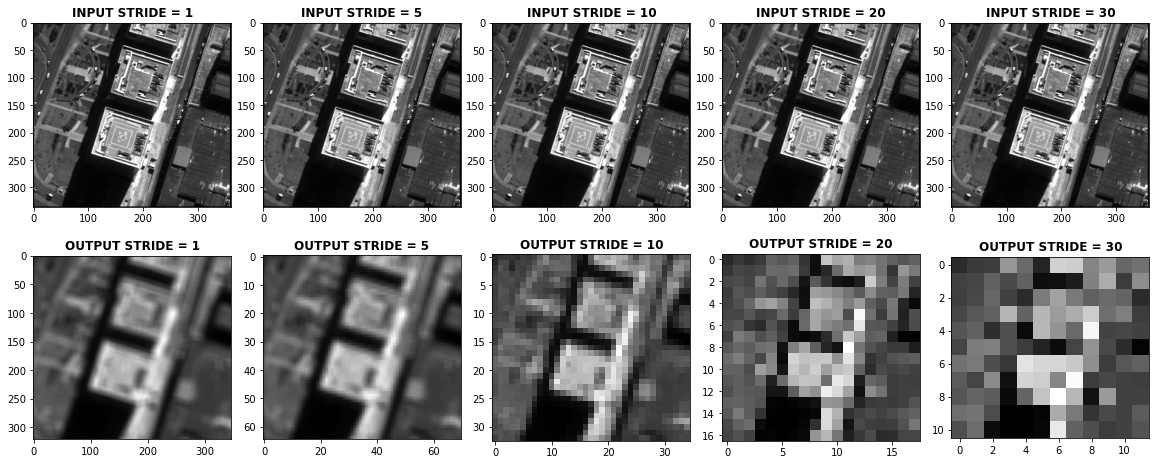

In [193]:
# Creating a class with methods to read image, apply filter and plot
class Image(object):
    """Image
    Exercise 1.2
    """
    def __init__(self, image_filepath):
        self.img_matrix = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
        
    def average_kernel(self, width=15, height=15, padding=1, stride=1, **kwargs):
        """Kernel filter using the average of a 15x15 window
        """
    
        avg_kernel = np.ones(height*width)/(height*width)
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        output = []
        for i in range(0, img_input.shape[0]-height, stride):
            temp = []
            for j in range(0, img_input.shape[1]-width, stride):
                temp.append(
                    np.dot(img_input[i:i+height, j:j+height].ravel(), avg_kernel)
                )
            output.append(temp)
            
        return img_input, np.array(output)
        
    def plot_input_and_output(self, **kwargs):
        fig, ax = plt.subplots(1, 2, figsize=(15, 35), facecolor='w')
        img_input, output = self.average_kernel()
        
        ax[0].set_title("ORIGINAL IMAGE (INPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[0].imshow(img_input, **kwargs)
        
        ax[1].set_title("IMAGE WITH FILTER (OUTPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[1].imshow(output, **kwargs)
        plt.savefig(f"./images/average_filter.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_multi_paddings(self, paddings=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(paddings), figsize=(20, 8), facecolor='w')
        
        for i, padding in enumerate(paddings):
            inp, out = self.average_kernel(padding=padding)
            
            ax[0][i].set_title(f"INPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_filter_multi_paddings.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_multi_strides(self, strides=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(strides), figsize=(20, 8), facecolor='w')
        
        for i, stride in enumerate(strides):
            inp, out = self.average_kernel(padding=1, stride=stride)
            
            ax[0][i].set_title(f"INPUT STRIDE = {stride}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT STRIDE = {stride}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_filter_multi_strides.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
        

# Creating object class and executing the methods
image = Image(image_filepath=raster_filename)
image.plot_multi_strides(cmap='gray')

### Exercise 3
<hr />

Create a convolution kernel called `high_pass_kernel` as a `numpy array` with the following weights:

```
-1 -1 -1 -1 -1
 2  2  2 -1 -1
-1  2  2  2 -1
-1 -1 -1  2  2
-1 -1 -1 -1 -1
```

then apply it to `raster_filename`.

Display, using `matplotlib`, the input (`rio_matrix`) image, the output (`conv_matrix`) image, and the kernel.

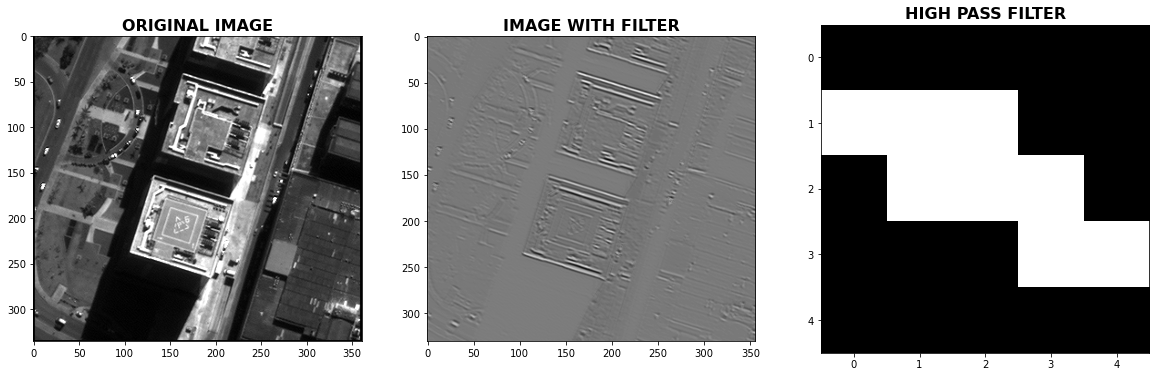

In [194]:
# Creating a class with methods to read image, apply filter and plot
class Image(object):
    """Image
    Exercise 1.2
    """
    def __init__(self, image_filepath):
        self.img_matrix = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
        
    def average_kernel(self, width=15, height=15, padding=1, stride=1, **kwargs):
        """Kernel filter using the average of a 15x15 window
        """
    
        avg_kernel = np.ones(height*width)/(height*width)
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        output = []
        for i in range(0, img_input.shape[0]-height, stride):
            temp = []
            for j in range(0, img_input.shape[1]-width, stride):
                temp.append(
                    np.dot(img_input[i:i+height, j:j+height].ravel(), avg_kernel)
                )
            output.append(temp)
            
        return img_input, np.array(output)
    
    def high_pass_kernel(self, **kwargs):
        kernel = np.array([
            [-1, -1, -1, -1, -1],
            [2, 2, 2, -1, -1], 
            [-1, 2, 2, 2, -1], 
            [-1, -1, -1, 2, 2], 
            [-1, -1, -1, -1, -1]
        ])
        height, width = kernel.shape
        padding = kwargs.get('padding', 1)
        stride = kwargs.get('stride', 1)
        kernel = kernel.ravel()
        
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        output = []
        for i in range(0, img_input.shape[0]-height, stride):
            temp = []
            for j in range(0, img_input.shape[1]-width, stride):
                temp.append(
                    np.dot(img_input[i:i+height, j:j+height].ravel(), kernel)
                )
            output.append(temp)
            
        return img_input, np.array(output), kernel.reshape((height, width))
        
        
        
    def plot_input_and_output(self, **kwargs):
        fig, ax = plt.subplots(1, 2, figsize=(15, 35), facecolor='w')
        img_input, output = self.average_kernel()
        
        ax[0].set_title("ORIGINAL IMAGE (INPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[0].imshow(img_input, **kwargs)
        
        ax[1].set_title("IMAGE WITH FILTER (OUTPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[1].imshow(output, **kwargs)
        plt.savefig(f"./images/average_filter.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        
        plt.show()
        
    def plot_multi_paddings(self, paddings=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(paddings), figsize=(20, 8), facecolor='w')
        
        for i, padding in enumerate(paddings):
            inp, out = self.average_kernel(padding=padding)
            
            ax[0][i].set_title(f"INPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_filter_multi_padding.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_multi_strides(self, strides=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(strides), figsize=(20, 8), facecolor='w')
        
        for i, stride in enumerate(strides):
            inp, out = self.average_kernel(padding=1, stride=stride)
            
            ax[0][i].set_title(f"INPUT STRIDE = {stride}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT STRIDE = {stride}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_multi_strides.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_high_pass_kernel(self, **kwargs):
        fig, ax = plt.subplots(1, 3, figsize=(20, 10), facecolor='w')
        
        inp, out, ker = self.high_pass_kernel()
        
        ax[0].set_title(f"ORIGINAL IMAGE", fontdict={'size': 16, 'weight': 'bold'})
        ax[0].imshow(inp, **kwargs)
        
        ax[1].set_title(f"IMAGE WITH FILTER", fontdict={'size': 16, 'weight': 'bold'})
        ax[1].imshow(out, **kwargs)
        
        ax[2].set_title(f"HIGH PASS FILTER", fontdict={'size': 16, 'weight': 'bold'})
        ax[2].imshow(ker, **kwargs)
        plt.savefig(f"./images/high_pass_kernel.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()      
        
        

# Creating object class and executing the methods
image = Image(image_filepath=raster_filename)
image.plot_high_pass_kernel(cmap='gray')

### Exercise 4
<hr />

Apply a $3 \times 3$ kernel filled with 1's, with two different operations: the first with dilation, and the second with erosion.

Display, using `matplotlib` input (`image_matrix`) and output (`dilation_matrix` and `erosion_matrix`) images.

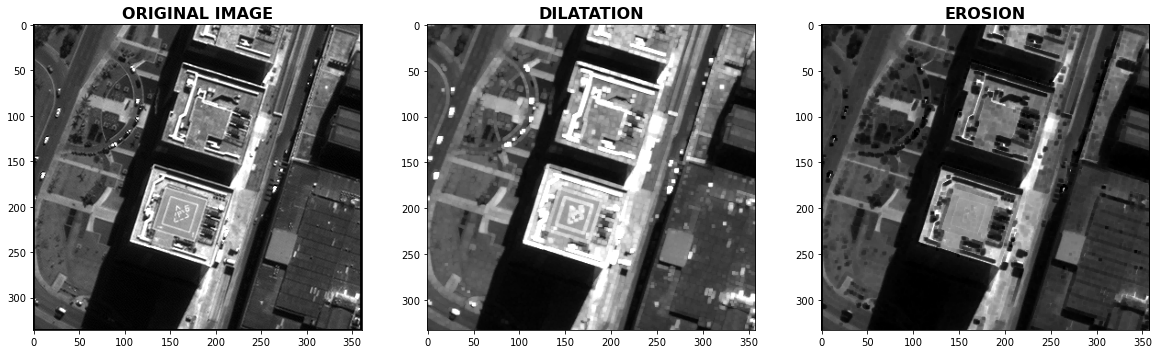

In [195]:
# Creating a class with methods to read image, apply filter and plot
class Image(object):
    """Image
    Exercise 1.2
    """
    def __init__(self, image_filepath):
        self.img_matrix = cv2.imread(image_filepath, cv2.IMREAD_GRAYSCALE)
        
    def average_kernel(self, width=15, height=15, padding=1, stride=1, **kwargs):
        """Kernel filter using the average of a 15x15 window
        """
        # Defining kernel and convolution parameters 
        avg_kernel = np.ones(height*width)/(height*width)
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        # List for output image
        output = []
        # Loop for rows.
        for i in range(0, img_input.shape[0]-height, stride):
            # Auxiliary list for current row
            temp = []
            # Loop for columns
            for j in range(0, img_input.shape[1]-width, stride):
                # Adding dot product of the sub-matrix and kernel
                temp.append(
                    np.dot(img_input[i:i+height, j:j+height].ravel(), avg_kernel)
                )
            output.append(temp)
            
        return img_input, np.array(output)
    
    def high_pass_kernel(self, **kwargs):
        # Defining kernel and convolution parameters 
        kernel = np.array([
            [-1, -1, -1, -1, -1],
            [2, 2, 2, -1, -1], 
            [-1, 2, 2, 2, -1], 
            [-1, -1, -1, 2, 2], 
            [-1, -1, -1, -1, -1]
        ])
        height, width = kernel.shape
        padding = kwargs.get('padding', 1)
        stride = kwargs.get('stride', 1)
        kernel = kernel.ravel()
        
        # Defining the padding of the image
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        # List for output image
        output = []
        # Loop for rows.
        for i in range(0, img_input.shape[0]-height, stride):
            # Auxiliary list for current row
            temp = []
            # Loop for columns
            for j in range(0, img_input.shape[1]-width, stride):
                # Adding dot product of the sub-matrix and kernel
                temp.append(
                    np.dot(img_input[i:i+height, j:j+height].ravel(), kernel)
                )
            output.append(temp)
            
        return img_input, np.array(output), kernel.reshape((height, width))
    
    def dilation_kernel(self, **kwargs):
        # Defining Convolution Parameters
        kernel = np.full((3, 3), 1)
        height, width = kernel.shape
        padding = kwargs.get('padding', 1)
        stride = kwargs.get('stride', 1)
        kernel = kernel.ravel()
        
        # Defining the padding of the image
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        # List for output image
        output = []
        # Loop for rows.
        for i in range(0, img_input.shape[0]-height, stride):
            # Auxiliary list for current row
            temp = []
            # Loop for columns
            for j in range(0, img_input.shape[1]-width, stride):
                # Taking two flattened sub-matrix copies
                submatrix = img_input[i:i+height, j:j+height].ravel().copy()
                aux = submatrix.copy()
                
                # Binarizing one of the sub-matrices
                aux[aux > 0] = 1
                
                # Checking if AT LEAST ONE of the binarized sub-array pixels matches 
                # the respective pixel from kernel.
                if (aux == kernel).any():
                    # Taking MAXIMUM value from sub-matrix.
                    temp.append(submatrix.max())
                else:
                    temp.append(0)
            output.append(temp)
            
        return img_input, np.array(output)
    
    
    def erosion_kernel(self, **kwargs):
        # Defining Convolution Parameters
        kernel = np.full((3, 3), 1)
        height, width = kernel.shape
        padding = kwargs.get('padding', 1)
        stride = kwargs.get('stride', 1)
        kernel = kernel.ravel()
        
        # Defining the padding of the image
        img_input = np.ones((self.img_matrix.shape[0]+(padding*2), 
                             self.img_matrix.shape[1]+(padding*2)))
        img_input[padding:-padding, padding:-padding] = self.img_matrix.copy()
        
        # List for output image
        output = []
        
        # Loop for rows.
        for i in range(0, img_input.shape[0]-height, stride):
            # Auxiliary list for current row
            temp = []
             # Loop for columns
            for j in range(0, img_input.shape[1]-width, stride):
                # Taking two flattened sub-matrix copies
                submatrix = img_input[i:i+height, j:j+height].ravel().copy()
                aux = submatrix.copy()
                
                # Binarizing one of the sub-matrices
                aux[aux > 0] = 1
                
                # Checking if AT ALL the binarized sub-array pixels matches the 
                # respective pixel from kernel.
                if not (False == (aux == kernel)).any():
                    # Taking MINIMUM value from sub-matrix.
                    temp.append(submatrix.min())
                else:
                    temp.append(0)
            output.append(temp)
            
        return img_input, np.array(output)
        
        
    def plot_input_and_output(self, **kwargs):
        fig, ax = plt.subplots(1, 2, figsize=(15, 35), facecolor='w')
        img_input, output = self.average_kernel()
        
        ax[0].set_title("ORIGINAL IMAGE (INPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[0].imshow(img_input, **kwargs)
        
        ax[1].set_title("IMAGE WITH FILTER (OUTPUT)", fontdict={'size': 18, 'weight': 'bold'})
        ax[1].imshow(output, **kwargs)
        plt.savefig(f"./images/average_filter.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        
        plt.show()
        
    def plot_multi_paddings(self, paddings=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(paddings), figsize=(20, 8), facecolor='w')
        
        for i, padding in enumerate(paddings):
            inp, out = self.average_kernel(padding=padding)
            
            ax[0][i].set_title(f"INPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT PADDING = {padding}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_filter_multi_padding.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_multi_strides(self, strides=[1, 5, 10, 20, 30], **kwargs):
        fig, ax = plt.subplots(2, len(strides), figsize=(20, 8), facecolor='w')
        
        for i, stride in enumerate(strides):
            inp, out = self.average_kernel(padding=1, stride=stride)
            
            ax[0][i].set_title(f"INPUT STRIDE = {stride}", fontdict={'size': 12, 'weight': 'bold'})
            ax[0][i].imshow(inp, **kwargs)

            ax[1][i].set_title(f"OUTPUT STRIDE = {stride}", fontdict={'size': 12, 'weight': 'bold'})
            ax[1][i].imshow(out, **kwargs)
        plt.subplots_adjust(hspace=0.15, wspace=0.16)
        plt.savefig(f"./images/average_multi_strides.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
    def plot_high_pass_kernel(self, **kwargs):
        fig, ax = plt.subplots(1, 3, figsize=(20, 10), facecolor='w')
        
        inp, out, ker = self.high_pass_kernel()
        
        ax[0].set_title(f"ORIGINAL IMAGE", fontdict={'size': 16, 'weight': 'bold'})
        ax[0].imshow(inp, **kwargs)
        
        ax[1].set_title(f"IMAGE WITH FILTER", fontdict={'size': 16, 'weight': 'bold'})
        ax[1].imshow(out, **kwargs)
        
        ax[2].set_title(f"HIGH PASS FILTER", fontdict={'size': 16, 'weight': 'bold'})
        ax[2].imshow(ker, **kwargs)
        plt.savefig(f"./images/high_pass_kernel.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()  
        
    
    def plot_dilatation_and_erosion(self, **kwargs):
        fig, ax = plt.subplots(1, 3, figsize=(20, 10), facecolor='w')
        
        inp, dil = self.dilation_kernel()
        _, ero = self.erosion_kernel()
        
        ax[0].set_title(f"ORIGINAL IMAGE", fontdict={'size': 16, 'weight': 'bold'})
        ax[0].imshow(inp, **kwargs)
        
        ax[1].set_title(f"DILATATION", fontdict={'size': 16, 'weight': 'bold'})
        ax[1].imshow(dil, **kwargs)
        
        ax[2].set_title(f"EROSION", fontdict={'size': 16, 'weight': 'bold'})
        ax[2].imshow(ero, **kwargs)
        plt.savefig(f"./images/dilatation_and_erosion.png", 
                transparent=False, bbox_inches='tight', pad_inches=0.1)
        plt.show()
        
        

# Creating object class and executing the methods
image = Image(image_filepath=raster_filename)
image.plot_dilatation_and_erosion(cmap='gray')